In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import requests
import time
import tqdm
from datetime import datetime
from scipy.stats import norm
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['axes.titlesize'] = 18
genesis = 1606824023

In [31]:
prop1 = []
val = 16
while val < 41:
    prop1.append(val)
    val *= 1.01
prop1 = np.asarray(prop1)

prop2 = []
val = 16
while val < 45:
    prop2.append(val)
    val *= 1.05
prop2 = np.asarray(prop2)

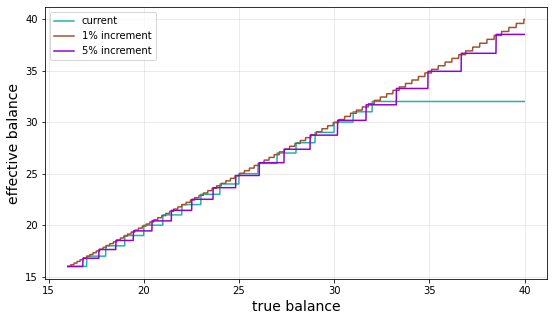

In [32]:
f, ax = plt.subplots(figsize=(9,5))

def cur(x): 
    if x < 32:
        return np.floor(x)
    return 32

def propVal(prop, x):
    for i in range(len(prop)-1):
        if x >= prop[i] and x < prop[i+1]:
            return prop[i]
    raise ValueError("no val found")


x = np.arange(16, 40, 0.01)
yCur = np.asarray([cur(v) for v in x])
yProp1 = np.asarray([propVal(prop1, v) for v in x])
yProp2 = np.asarray([propVal(prop2, v) for v in x])
ax.plot(x, yCur, '-', fillstyle='none', color='lightseagreen', label='current')
ax.plot(x, yProp1, '-', fillstyle='none', color='sienna', label='1% increment')
ax.plot(x, yProp2, '-', fillstyle='none', color='darkviolet', label='5% increment')

ax.set_xlabel('true balance', size=14)
ax.set_ylabel('effective balance', size=14)
ax.legend()
plt.show()

In [2]:
def cdf(k):
    return (np.floor(k)) / 256

In [3]:
vals = np.asarray([255 * e / 32 for e in range(16,33)])
cdfs = cdf(vals)

In [4]:
cdfs

array([0.49609375, 0.52734375, 0.55859375, 0.58984375, 0.62109375,
       0.65234375, 0.68359375, 0.71484375, 0.74609375, 0.77734375,
       0.80859375, 0.83984375, 0.87109375, 0.90234375, 0.93359375,
       0.96484375, 0.99609375])

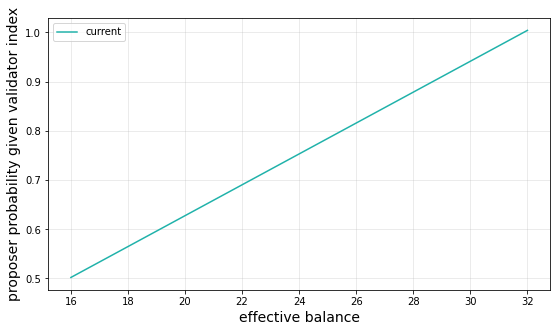

In [39]:
f, ax = plt.subplots(figsize=(9,5))


x = np.arange(16, 33)
ax.plot(x, cdfs, '-', fillstyle='none', color='lightseagreen', label='current')

ax.set_xlabel('effective balance', size=14)
ax.set_ylabel('proposer probability given validator index', size=14)
ax.legend()
plt.show()

In [2]:
norm().cdf(0)

0.5

In [4]:
def binomapprox(x, n, p):
    return norm(loc=n*p, scale=np.sqrt(n*p*(1-p))).cdf(x-0.5)

In [12]:
570000, 570000 / 32, 570000 / 32 / 2, 0.49

(570000, 17812.5, 8906.25, 0.49)

In [18]:
1-binomapprox(8906.25, 17812.5, 0.48)

4.768904704466337e-08

In [ ]:
# failure prob as a function of honest or malicious weight

In [5]:
def probFailure(n, p):
    return binomapprox(n/2, n, p)

In [6]:
valSize = 575000
comSize = valSize/32
comSize

17968.75

In [8]:
probFailure(comSize, 0.52)

3.857642532442596e-08

In [32]:
valSize/4/32, comSize/4

(4492.1875, 4492.1875)

In [2]:
2048/32

64.0

In [74]:
ps = np.linspace(0.5, 0.56, 100)
fProbs = [probFailure(comSize, p) for p in ps]

fProbs2 = [probFailure(comSize/4, p) for p in ps]
fProbs3 = [probFailure(comSize/2, p) for p in ps]
fProbs4 = [probFailure(comSize/8, p) for p in ps]

In [64]:
300 * 24

7200

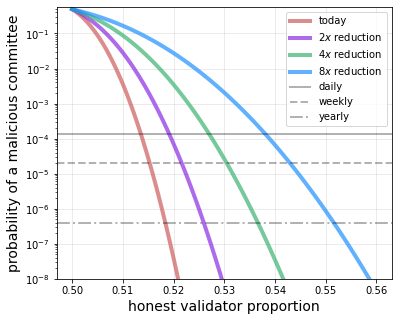

In [75]:
f, ax = plt.subplots(figsize=(6,5))

ax.plot(ps, fProbs, '-', color='indianred', linewidth=4, alpha=0.7, label='today')
ax.plot(ps, fProbs3, '-', color='blueviolet', linewidth=4, alpha=0.7, label='$2x$ reduction')
ax.plot(ps, fProbs2, '-', color='mediumseagreen', linewidth=4, alpha=0.7, label='$4x$ reduction')
ax.plot(ps, fProbs4, '-', color='dodgerblue', linewidth=4, alpha=0.7, label='$8x$ reduction')

ax.set_yscale('log')

ax.axhline(1/7200, label="daily", color='k', linewidth=2, alpha=0.3)
ax.axhline(1/50400, linestyle='--', label="weekly", color='k', linewidth=2, alpha=0.3)
ax.axhline(1/2628000, linestyle='-.', label="yearly", color='k', linewidth=2, alpha=0.3)

ax.set_xlabel('honest validator proportion', size=14)
ax.set_ylabel('probability of a malicious committee', size=14)
ax.set_ylim(float(1e-8), 0.57)
plt.legend()
plt.show()

In [9]:
ps = np.linspace(0.5, 0.66, 100)
fProbs = [probFailure(2048, p) for p in ps]

fProbs2 = [probFailure(1024, p) for p in ps]
fProbs3 = [probFailure(512, p) for p in ps]
fProbs4 = [probFailure(256, p) for p in ps]

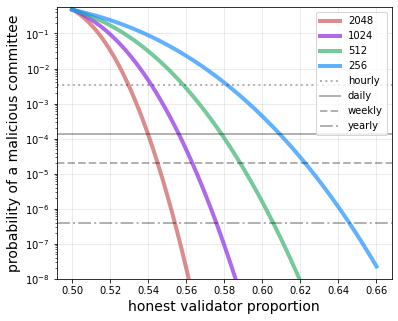

In [12]:
f, ax = plt.subplots(figsize=(6,5))

ax.plot(ps, fProbs, '-', color='indianred', linewidth=4, alpha=0.7, label='2048')
ax.plot(ps, fProbs2, '-', color='blueviolet', linewidth=4, alpha=0.7, label='1024')
ax.plot(ps, fProbs3, '-', color='mediumseagreen', linewidth=4, alpha=0.7, label='512')
ax.plot(ps, fProbs4, '-', color='dodgerblue', linewidth=4, alpha=0.7, label='256')

ax.set_yscale('log')

ax.axhline(1/300, label="hourly", linestyle='dotted', color='k', linewidth=2, alpha=0.3)
ax.axhline(1/7200, label="daily", color='k', linewidth=2, alpha=0.3)
ax.axhline(1/50400, linestyle='--', label="weekly", color='k', linewidth=2, alpha=0.3)
ax.axhline(1/2628000, linestyle='-.', label="yearly", color='k', linewidth=2, alpha=0.3)

ax.set_xlabel('honest validator proportion', size=14)
ax.set_ylabel('probability of a malicious committee', size=14)
ax.set_ylim(float(1e-8), 0.57)
plt.legend()
plt.show()